In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Bronowice = pd.read_csv("results/res_100/b_avg_res_100.csv", index_col=0)
Bronowice['Area']='Bronowice'
Skotniki = pd.read_csv("results/res_100/s_avg_res_100.csv", index_col=0)
Skotniki['Area']='Skotniki'
df = pd.concat([Bronowice, Skotniki])
df['prob of choosing'] = df['p_SUM']
df['reduction in waiting times for PT'] = df['tw_PT_OD'] - df['tw_PT_HD']
df['new service attractiveness'] = df['u_PT_OD']-df['u_SUM_OD']
mu = -0.1
df['added value'] = np.log(np.exp(mu*df['u_PT_OD'])+np.exp(mu*df['u_SUM_OD'])-np.log(np.exp(mu*df['u_PT_OD'])))
df

,tw_PT_OD,tw_PT_HD,u_PT_OD,u_PT_HD,u_SUM_OD,p_SUM,Area,prob of choosing,reduction in waiting times for PT,new service attractiveness,added value
0,118.652381,44.195238,13.346479,10.062331,15.710112,0.347994,Bronowice,0.347994,74.457143,-2.363633,0.590967
1,101.334951,47.004854,13.372146,10.364450,15.966013,0.282237,Bronowice,0.282237,54.330097,-2.593866,0.589105
2,133.364929,65.857820,14.060250,10.863897,16.628883,0.201165,Bronowice,0.201165,67.507109,-2.568633,0.610163
3,121.357488,40.429952,13.839512,10.383354,16.061740,0.269705,Bronowice,0.269705,80.927536,-2.222228,0.607149
4,106.024038,36.009615,12.912970,9.834269,15.480971,0.279351,Bronowice,0.279351,70.014423,-2.568000,0.575975
...,...,...,...,...,...,...,...,...,...,...,...
95,149.864516,106.438710,14.692406,11.055341,16.498619,0.254404,Skotniki,0.254404,43.425806,-1.806213,0.637326
96,141.928105,109.764706,14.942342,11.326090,16.745436,0.230780,Skotniki,0.230780,32.163399,-1.803094,0.645032
97,168.112583,132.556291,14.990620,11.542116,17.051083,0.254379,Skotniki,0.254379,35.556291,-2.060463,0.644038
98,132.815789,133.032895,14.797174,11.195861,16.440400,0.273711,Skotniki,0.273711,-0.217105,-1.643227,0.642179


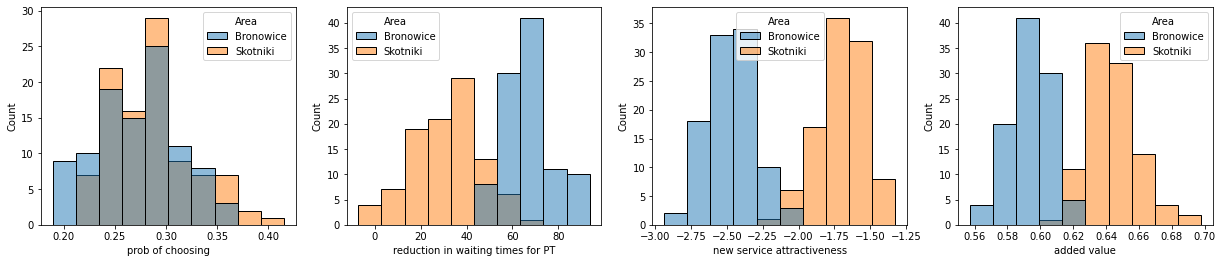

In [3]:
fig, ax = plt.subplots(1,4, figsize=(21,4))
                       
for i, col in enumerate(df.columns[-4:]):
    sns.histplot(data = df, x = col,  hue = 'Area', bins = 10, ax = ax[i])
    

In [4]:
results_SUM = round(df.groupby('Area').mean(), 3)
results_SUM

,tw_PT_OD,tw_PT_HD,u_PT_OD,u_PT_HD,u_SUM_OD,p_SUM,prob of choosing,reduction in waiting times for PT,new service attractiveness,added value
Area,,,,,,,,,,
Bronowice,118.925,52.176,13.462,10.272,15.928,0.271,0.271,66.750,-2.466,0.593
Skotniki,152.626,121.236,14.868,11.181,16.569,0.286,0.286,31.389,-1.700,0.644


In [ ]:
# results_SUM.to_csv("results/main_indicators_SUM.csv")